In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
import missingno as mn


In [2]:
data = pd.read_csv('C:/Users/Shankar/jupyter notes/test.csv.')
data

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [3]:
data1 = pd.read_csv('C:/Users/Shankar/jupyter notes/train.csv.')
data1

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [5]:
data1.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [6]:
data1['toxic'].value_counts()

toxic
0    144277
1     15294
Name: count, dtype: int64

In [7]:
144277+15294


159571

In [8]:
data1['severe_toxic'].value_counts()

severe_toxic
0    157976
1      1595
Name: count, dtype: int64

In [9]:
157976+1595

159571

In [10]:
data1['obscene'].value_counts()

obscene
0    151122
1      8449
Name: count, dtype: int64

In [11]:
data1['threat'].value_counts()

threat
0    159093
1       478
Name: count, dtype: int64

In [12]:
data1['insult'].value_counts()

insult
0    151694
1      7877
Name: count, dtype: int64

In [13]:
data1['identity_hate'].value_counts()

identity_hate
0    158166
1      1405
Name: count, dtype: int64

In [14]:

data1['comment_text'].value_counts()

comment_text
Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27                                                                                                                                                                                                                                                                                                                                                                             1
D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)                                                                                                                                                                                                                                                   

In [15]:
df = data1.copy()

In [16]:
#text preprocessing

In [17]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['cleaned'] = df['comment_text'].apply(clean_text)


In [18]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,cleaned
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation\nwhy the edits made under my usern...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,daww he matches this background colour im seem...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man im really not trying to edit war its j...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,\nmore\ni cant make any real suggestions on im...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,you sir are my hero any chance you remember wh...
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,and for the second time of asking when your vi...
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,you should be ashamed of yourself \n\nthat is ...
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,spitzer \n\numm theres no actual article for p...
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,and it looks like it was actually you who put ...


In [19]:
df['cleaned'].value_counts()

cleaned
  january                                                                                                                                                                                                                                                 15
  jun  utc                                                                                                                                                                                                                                                13
  february                                                                                                                                                                                                                                                10
  feb  utc                                                                                                                                                                                                                               

In [20]:
#Tokenization + Stopword Removal

In [21]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['processed'] = df['cleaned'].apply(preprocess)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shankar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Shankar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shankar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,cleaned,processed
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation\nwhy the edits made under my usern...,explanation edits made username hardcore metal...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,daww he matches this background colour im seem...,daww matches background colour im seemingly st...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man im really not trying to edit war its j...,hey man im really trying edit war guy constant...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,\nmore\ni cant make any real suggestions on im...,cant make real suggestions improvement wondere...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,you sir are my hero any chance you remember wh...,sir hero chance remember page thats
...,...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,and for the second time of asking when your vi...,second time asking view completely contradicts...
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,you should be ashamed of yourself \n\nthat is ...,ashamed horrible thing put talk page
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,spitzer \n\numm theres no actual article for p...,spitzer umm theres actual article prostitution...
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,and it looks like it was actually you who put ...,looks like actually put speedy first version d...


In [23]:
#Vectorization (Convert Text → Numbers)

In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['processed'])

sequences = tokenizer.texts_to_sequences(df['processed'])

X = pad_sequences(sequences, maxlen=100)
y = df['toxic']


In [25]:
X

array([[   0,    0,    0, ...,   58,   13, 3210],
       [   0,    0,    0, ...,    4,  790,   86],
       [   0,    0,    0, ..., 2139,  550,  349],
       ...,
       [   0,    0,    0, ..., 7532, 3280, 4252],
       [   0,    0,    0, ...,  261,   55,   61],
       [   0,    0,    0, ...,  239, 1370, 1558]],
      shape=(159571, 100), dtype=int32)

In [26]:
y

0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Name: toxic, Length: 159571, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [28]:
#LSTM Model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential()

model.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()


E:\GUVI\Newfolder\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test,y_test))


Epoch 1/5
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 99s 24ms/step - accuracy: 0.9532 - loss: 0.1378 - val_accuracy: 0.9608 - val_loss: 0.1159
Epoch 2/5
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 96s 24ms/step - accuracy: 0.9642 - loss: 0.0988 - val_accuracy: 0.9610 - val_loss: 0.1109
Epoch 3/5
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 98s 25ms/step - accuracy: 0.9698 - loss: 0.0792 - val_accuracy: 0.9586 - val_loss: 0.1262
Epoch 4/5
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 96s 24ms/step - accuracy: 0.9759 - loss: 0.0641 - val_accuracy: 0.9564 - val_loss: 0.1408
Epoch 5/5
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 96s 24ms/step - accuracy: 0.9801 - loss: 0.0516 - val_accuracy: 0.9551 - val_loss: 0.1638


In [31]:
from sklearn.metrics import classification_report, confusion_matrix

pred = model.predict(X_test)


998/998 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step


In [32]:
pred_labels = (pred > 0.5).astype(int)


In [33]:
print(classification_report(y_test, pred_labels))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     28859
           1       0.83      0.67      0.74      3056

    accuracy                           0.96     31915
   macro avg       0.90      0.83      0.86     31915
weighted avg       0.95      0.96      0.95     31915



In [34]:
print(confusion_matrix(y_test, pred_labels))

[[28448   411]
 [ 1021  2035]]


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

Axes(0.125,0.11;0.62x0.77)


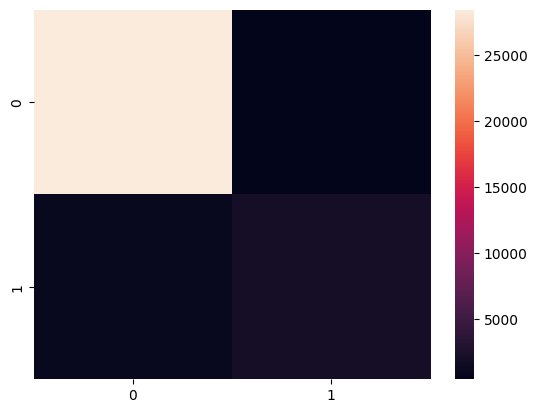

In [36]:
print(sns.heatmap(confusion_matrix(y_test, pred_labels)))

In [37]:
model.save("toxicity_model.keras")

import pickle
pickle.dump(tokenizer, open("tokenizer.pkl", "wb"))


In [38]:
#CNN Model

In [39]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D

model_cnn = Sequential()
model_cnn.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
model_cnn.add(Conv1D(64, 5, activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(1, activation='sigmoid'))
model_cnn.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_cnn.summary()

E:\GUVI\Newfolder\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
model_cnn.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test,y_test))


Epoch 1/5
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 39s 10ms/step - accuracy: 0.9533 - loss: 0.1346 - val_accuracy: 0.9585 - val_loss: 0.1142
Epoch 2/5
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.9681 - loss: 0.0887 - val_accuracy: 0.9537 - val_loss: 0.1289
Epoch 3/5
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 39s 10ms/step - accuracy: 0.9809 - loss: 0.0550 - val_accuracy: 0.9551 - val_loss: 0.1418
Epoch 4/5
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.9895 - loss: 0.0320 - val_accuracy: 0.9523 - val_loss: 0.1767
Epoch 5/5
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.9936 - loss: 0.0223 - val_accuracy: 0.9503 - val_loss: 0.2036


In [41]:
y_pred_prob = model_cnn.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
y_pred = y_pred.flatten()


998/998 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     28859
           1       0.77      0.69      0.73      3056

    accuracy                           0.95     31915
   macro avg       0.87      0.83      0.85     31915
weighted avg       0.95      0.95      0.95     31915



In [43]:
print(confusion_matrix(y_test, y_pred))

[[28220   639]
 [  948  2108]]


In [44]:
print(confusion_matrix(y_test, pred_labels))

[[28448   411]
 [ 1021  2035]]


In [45]:
print(classification_report(y_test, pred_labels))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     28859
           1       0.83      0.67      0.74      3056

    accuracy                           0.96     31915
   macro avg       0.90      0.83      0.86     31915
weighted avg       0.95      0.96      0.95     31915



In [46]:
#BiLSTM

In [47]:
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout

In [48]:

model_BiLSTM = Sequential()

model_BiLSTM.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
model_BiLSTM.add(Bidirectional(LSTM(64, return_sequences=False)))
model_BiLSTM.add(Dropout(0.5))
model_BiLSTM.add(Dense(64, activation='relu'))
model_BiLSTM.add(Dropout(0.3))
model_BiLSTM.add(Dense(1, activation='sigmoid'))

model_BiLSTM.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model_BiLSTM.summary()



E:\GUVI\Newfolder\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [49]:
model_BiLSTM.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test,y_test))

Epoch 1/5
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 121s 30ms/step - accuracy: 0.9537 - loss: 0.1379 - val_accuracy: 0.9594 - val_loss: 0.1102
Epoch 2/5
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 121s 30ms/step - accuracy: 0.9636 - loss: 0.0995 - val_accuracy: 0.9607 - val_loss: 0.1110
Epoch 3/5
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 114s 29ms/step - accuracy: 0.9691 - loss: 0.0805 - val_accuracy: 0.9592 - val_loss: 0.1276
Epoch 4/5
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 119s 30ms/step - accuracy: 0.9745 - loss: 0.0665 - val_accuracy: 0.9572 - val_loss: 0.1442
Epoch 5/5
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 119s 30ms/step - accuracy: 0.9790 - loss: 0.0547 - val_accuracy: 0.9554 - val_loss: 0.1576


In [50]:
y_pred_prob_BiLSTM = model_BiLSTM.predict(X_test)
y_pred_BiLSTM = (y_pred_prob_BiLSTM  > 0.5).astype(int).flatten()

998/998 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step


In [51]:
print(classification_report(y_test, y_pred_BiLSTM))


              precision    recall  f1-score   support

           0       0.97      0.98      0.98     28859
           1       0.79      0.72      0.76      3056

    accuracy                           0.96     31915
   macro avg       0.88      0.85      0.87     31915
weighted avg       0.95      0.96      0.95     31915



In [72]:
y_pred_prob_adj_BiLSTM = model_BiLSTM.predict(X_test)
y_pred_adj_BiLSTM = (y_pred_prob_BiLSTM  > 0.35).astype(int).flatten()

998/998 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step


In [73]:
print(classification_report(y_test, y_pred_adj_BiLSTM))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     28859
           1       0.73      0.77      0.75      3056

    accuracy                           0.95     31915
   macro avg       0.85      0.87      0.86     31915
weighted avg       0.95      0.95      0.95     31915



In [74]:
model_BiLSTM.save("toxicity_model_BiLSTM.keras")

import pickle
pickle.dump(tokenizer, open("tokenizer.pkl", "wb"))

In [53]:
import os
print("Saved in:", os.getcwd())



Saved in: C:\Users\Shankar\jupyter notes


In [54]:
import os
import pickle
import tensorflow as tf

model_path = os.path.join(os.getcwd(), "toxicity_model_BiLSTM.keras")
tokenizer_path = os.path.join(os.getcwd(), "tokenizer.pkl")

model = tf.keras.models.load_model(model_path, compile=False)

with open(tokenizer_path, "rb") as f:
    tokenizer = pickle.load(f)


In [55]:
model_path

'C:\\Users\\Shankar\\jupyter notes\\toxicity_model_BiLSTM.keras'

In [56]:
model

<Sequential name=sequential_2, built=True>

In [57]:
tokenizer

In [61]:
import keras
from keras.models import load_model
new_model = keras.models.load_model("toxicity_model_BiLSTM.keras")



In [62]:
new_model.evaluate(X_test,y_test, verbose = 2)

998/998 - 7s - 7ms/step - accuracy: 0.9554 - loss: 0.1576


[0.15757733583450317, 0.9554441571235657]

In [64]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [67]:
y_pred_prob_BiLSTM = model_BiLSTM.predict(X_test)



998/998 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step


In [68]:
auc_score = roc_auc_score(y_test, y_pred_prob_BiLSTM)
print("ROC-AUC Score:", auc_score)


ROC-AUC Score: 0.949407382237051


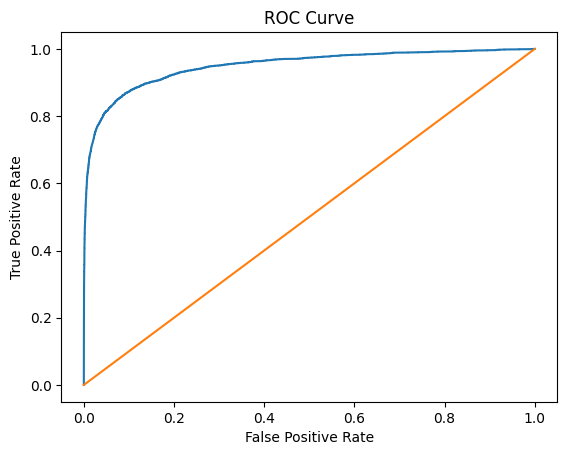

In [69]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_BiLSTM)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])  # random line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()
